Mounted at google drive and change the path to Eval directory

In [17]:
# Mounted at google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Change the path to Eval directory
import os
os.chdir('/content/drive/MyDrive/SR_Code/Scripts/Data/Test/psnr_ssim')

Part 1: evaluate the performance of the model with RRDB and resnet architecutres on HHFQ dataset

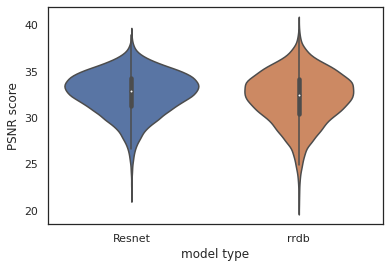

In [19]:
# Violinplot of PSNR and SSIM scores on FFHQ test set for RRDB and Resnet architectures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
import pandas as pd
import json
import numpy as np

with open('PSNR_SSIM_resnet.json','r') as f:
  load_resnet_hq = json.load(f)

with open('PSNR_SSIM_rrdb.json','r') as f:
  load_rrdb_hq = json.load(f)

with open('PSNR_SSIM_bicubic.json','r') as f:
  load_bic_hq = json.load(f)

with open('PSNR_SSIM_srgan_hhfq.json','r') as f:
  load_srgan_hq = json.load(f)

# assign data of lists.
data1 = {'PSNR score': load_resnet_hq['PSNR'], 'SSIM score':load_resnet_hq['SSIM'] }
# Create DataFrame.
df1 = pd.DataFrame(data1)
df1['model type'] = 'Resnet'


data2 = {'PSNR score': load_rrdb_hq['PSNR'], 'SSIM score':load_rrdb_hq['SSIM']}
# Create DataFrame.
df2 = pd.DataFrame(data2)
df2['model type'] = 'rrdb'

df_1 = pd.concat([df1,df2],axis=0,join='outer')
sns.violinplot(x='model type', y='PSNR score', showmeans = True, data = df_1)
plt.savefig('PSNR_score_1.png')

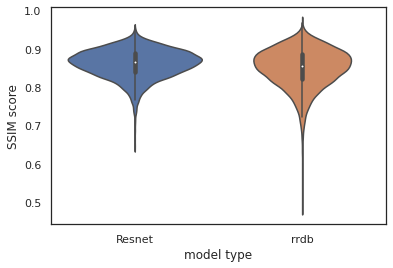

In [20]:
sns.violinplot(x='model type', y='SSIM score', data = df_1)
plt.savefig('SSIM_score_1.png')

Part 2: evaluate the performance of different models on HHFQ dataset

In [21]:
# Output average PSNR and SSIM score on FFHQ dataset
# Calculate the PSNR and SSIM score with bicubic model
data_bic = {'PSNR score':  np.mean(load_bic_hq['PSNR']), 'SSIM score': np.mean(load_bic_hq['SSIM']) }
df_bic_hq = pd.DataFrame(data_bic, index = ['bicubic'])

# Calculate the PSNR and SSIM score with SRGAN model
data_srgan = {'PSNR score':  np.mean(load_srgan_hq['PSNR']), 'SSIM score': np.mean(load_srgan_hq['SSIM']) }
df_srgan_hq = pd.DataFrame(data_srgan, index = ['srgan'])

# Calculate the PSNR and SSIM score with our model
data_resnet = {'PSNR score':  np.mean(load_resnet_hq['PSNR']), 'SSIM score': np.mean(load_resnet_hq['SSIM']) }
df_resnet_hq = pd.DataFrame(data_resnet, index = ['mymodel'])

df_2 = pd.concat([df_bic_hq, df_srgan_hq, df_resnet_hq],axis=0,join='outer')
df_2

,PSNR score,SSIM score
bicubic,29.487209,0.834407
srgan,34.894044,0.910039
mymodel,32.651496,0.860884


Part 2: evaluate the performance of different models on self-collected dataset

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
import pandas as pd
import json
import numpy as np

with open('PSNR_SSIM_sci_bic.json','r') as f:
  load_bic_self = json.load(f)

with open('PSNR_SSIM_srgan_sci.json','r') as f:
  load_srgan_self = json.load(f)

with open('PSNR_SSIM_sci.json','r') as f:
  load_my_self = json.load(f)

In [23]:
# Output average PSNR and SSIM score on self-collected dataset
# Calculate the PSNR and SSIM score with bicubic model
data_bic = {'PSNR score':  np.mean(load_bic_self['PSNR']), 'SSIM score': np.mean(load_bic_self['SSIM']) }
df_bic_self = pd.DataFrame(data_bic, index = ['bicubic'])

# Calculate the PSNR and SSIM score with SRGAN model
data_srgan = {'PSNR score':  np.mean(load_srgan_self['PSNR']), 'SSIM score': np.mean(load_srgan_self['SSIM']) }
df_srgan_self = pd.DataFrame(data_srgan, index = ['srgan'])

# Calculate the PSNR and SSIM score with our model
data_my = {'PSNR score':  np.mean(load_my_self['PSNR']), 'SSIM score': np.mean(load_my_self['SSIM']) }
df_my_self = pd.DataFrame(data_my, index = ['mymodel'])

df_3 = pd.concat([df_bic_self,df_srgan_self,df_my_self],axis=0,join='outer')
df_3


,PSNR score,SSIM score
bicubic,25.340216,0.736295
srgan,30.695594,0.875270
mymodel,27.434776,0.792031


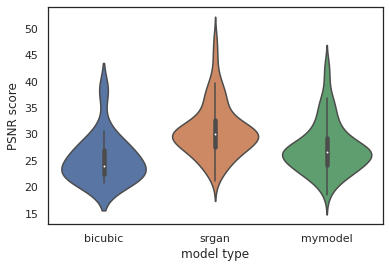

In [25]:
# Violinplot of PSNR and SSIM scores on self-collected dataset of Bicubic, SRGAN and our model
# assign data of lists.
data_bic = {'PSNR score': load_bic_self['PSNR'], 'SSIM score':load_bic_self['SSIM'] }
# Create DataFrame.
df1 = pd.DataFrame(data_bic)
df1['model type'] = 'bicubic'

data_srgan = {'PSNR score': load_srgan_self['PSNR'], 'SSIM score':load_srgan_self['SSIM']}
# Create DataFrame.
df2 = pd.DataFrame(data_srgan)
df2['model type'] = 'srgan'

data_my = {'PSNR score': load_my_self['PSNR'], 'SSIM score':load_my_self['SSIM']}
# Create DataFrame.
df3 = pd.DataFrame(data_my)
df3['model type'] = 'mymodel'

df_4 = pd.concat([df1,df2,df3],axis=0,join='outer')
sns.violinplot(x='model type', y='PSNR score', showmeans = True, data = df_4)
plt.savefig('PSNR_score_2.png')



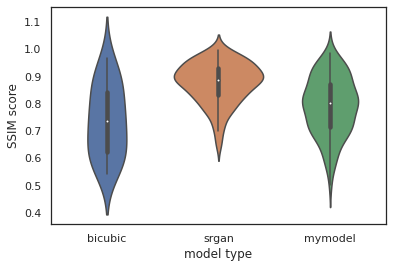

In [26]:
sns.violinplot(x='model type', y='SSIM score', data = df_4)
plt.savefig('SSIM_score_2.png')